### US Baby Names 1880-2010

### 이 데이터로 할 수 있는 것
- 시대별로 특정 이름이 차지하는 비율을 구해 얼마나 흔한 이름인지 알아보기
- 이름의 상대 순위 알아보기
- 각 연도별 가장 인기 있는 이름, 가장 빈도가 높거나 낮은 이름 알아보기
- 모음, 자음, 길이, 전반적인 다양성, 철자 변화, 첫 글자와 마지막 글자 등, 이름 유행 분석하기
- 성서에 등장하는 이름, 유명인, 인구통계학적 변화 등 외부 자료를 통한 유행 분석하기

In [2]:
!head -n 10 ch02/names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [31]:
### 데이터셋 로드 ###
import pandas as pd
import numpy as np
%matplotlib inline
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
### 성별별 아이들이 태어난 날짜 수 합계 ###
names1880.groupby('sex').births.sum()


sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
### year별로 파일들이 나뉘어져있기 때문에 이들을 하나로 합치고 year 필드를 넣는 것이 좋다 ###
# 2010이 가장 최신년도이다.
years = range(1880, 2011) # 슬라이싱(2011년은 포함안됨)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

'''
지금 pieces의 리스트 안에 각 year의 값이 append가 되는 상황이다.
frame을 찍으면 33838row가 나오는데 이는 2010년의 frame(for문에서 마지막 돈 값)이
출력되는 것 뿐이다. 따라서 concat으로 하나의 데이터프레임으로 만들어주어야 한다.
'''

'\n지금 pieces의 리스트 안에 각 year의 값이 append가 되는 상황이다.\nframe을 찍으면 33838row가 나오는데 이는 2010년의 frame(for문에서 마지막 돈 값)이\n출력되는 것 뿐이다. 따라서 concat으로 하나의 데이터프레임으로 만들어주어야 한다.\n'

In [6]:
# 하나의 데이터프레임으로 concatenate
names = pd.concat(pieces, ignore_index=True)
names

# concat은 row-wise(one rows at a time)방식이 default이다.
# ignore_index를 True로 해서 원래의 row number를 없애주어야한다.

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [7]:
### 년별 성별 데이터를 만들기 (using groupby, pivot_table)
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


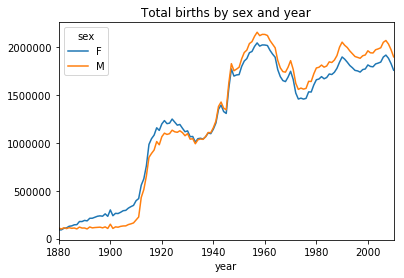

In [8]:
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [9]:
### 동일한 이름의 아이들이 한 해에 몇퍼센트나 태어났는지 ###
# year, sex를 groupping하고 새로운 컬럼을 집어넣는다.
def add_prop(group):
    # Integer division floors (정수에서 실수로 계산되는 것이므로 형변환 해주어야 한다)
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
# groupping 할 필드가 2개 이상이므로 리스트형태로 집어넣는다. (순서 상관있는거 같음)
# apply메소드는 R의 apply함수와 비슷한 것 같다.
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [10]:
### 아이들 이름이 나타난 비율을 내림차순으로 정렬 ###
stars = names.sort_values(by='prop', ascending=False)
stars.head(10)

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
2938,John,M,8769,1881,0.087039
943,William,M,9533,1880,0.086277
7116,John,M,8894,1883,0.085003
2939,William,M,8524,1881,0.084607
4963,John,M,9557,1882,0.084064
9318,John,M,9387,1884,0.082022
4964,William,M,9298,1882,0.081786
14019,John,M,9026,1886,0.081473
11640,John,M,8756,1885,0.081223


In [11]:
# sanity check를 하자. 합계가 1이 맞는지 확인
# allclose 메소드는 두 수를 비교한다. 오차를 정의할 수 있어서 어느정도 용인이 가능
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(),1)

True

In [12]:
# 더 많은 분석을 용이하기 위해 탑1000 이름을 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [13]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [14]:
### 분석에 사용할 각 연도별, 성별에 따른 빈도수가 가장 높은 이름 1,000개 추출 ###
# top1000의 다른 예
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    # year, group 이라고 for문에 준 이유가 year별 group(레코드)별로 돌아가야되니까 아닐가
top1000 = pd.concat(pieces, ignore_index=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [23]:
### 상위 1,000개의 데이터를 남자아이와 여자아이로 분리 ###
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
boys.head(5)

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


In [24]:
# 연도와 이름에 대한 전체 출생수를 피벗 테이블로 만들기
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE2C6D6B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002AE2DA77C50>], dtype=object)

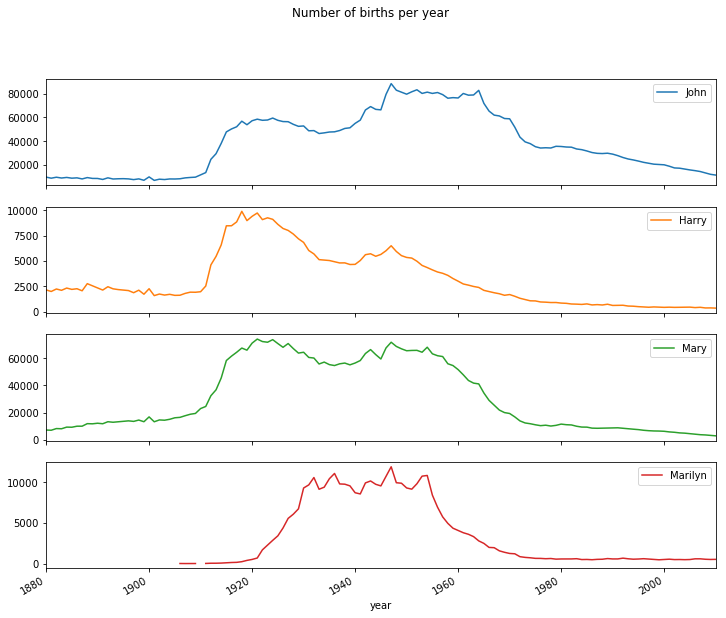

In [26]:
### DataFrame의 plot 메서드를 사용해서 몇몇 이름의 추이를 그래프로 그려보자 ###
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

# 그래프를 보았을 때 점점 줄어드는 걸로 보아 부모가 아이 이름 짓기를 꺼려하는걸로 판단된다.

In [27]:
### 인기 있는 이름 1,000개가 전체 출생수에서 차지하는 비율을 그래프로 그리면 ###
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


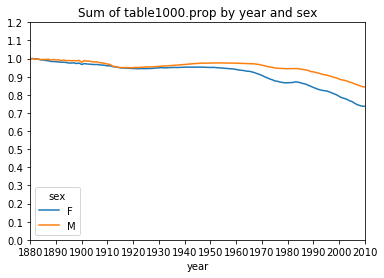

In [28]:
# 그래프 그리기
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
# linspace(시작값, 마침값, split 구간수), range(시작값, 끝값, gap)

# 이름이 점점 다양해지고 있음을 확인할 수 있다.

In [66]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [67]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [68]:
### prop를 내림차순하고 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 알아보기 ###
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
# cumsum : Return cumulative sum over requested axis

# 배열의 색인은 0부터 시작하기 때문에 결과에 1을 더해주면 117이 된다. (0.5가 되는 칼럼)
prop_cumsum.searchsorted(0.5)
# prop_cumsum.values.searchsorted(0.5)
# searchsorted : Find indices where elements should be inserted to maintain order.
# 정렬된 배열에서 원소찾기

array([116], dtype=int64)

In [70]:
df = boys[boys.year == 1900]

in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1 # 0부터 시작이니 + 1

# 1900년에는 117보다 더 낮았다. 이는 예전에는 인기있는 이름에 더 몰렸다는 얘기가 된다.

array([25], dtype=int64)

In [79]:
### 이 연산을 각 연도와 성별 조합에 적용할 수 있다. 연도와 성별을 groupby로 묶고
### 각 그룹에 apply를 사용해ㅐ서 이 연산을 적용시킨다 ###
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=True)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,[905],[988]
1881,[901],[984]
1882,[963],[987]
1883,[962],[987]
1884,[963],[986]
1885,[962],[985]
1886,[962],[985]
1887,[962],[985]
1888,[961],[985]


In [76]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
type(diversity) # unstack을 하기 전에는 pandas Series Object
# unstack을 하게 되면 말 그대로 F 와 M 이 수직으로 쌓이는게 아니라 횡렬로 쌓이게 된다.

pandas.core.series.Series